# Lab 3 - Leonardo Gargitter GRR20172145

O objetivo desta atividade é o processo de fixação de conceitos relacionados a modulação FM estudada. Neste laboratório, você terá alguns recursos para formação de gráficos em python com diferentes tipos de modulação. As modulações presentes são PM e FM. Você deve mudar os sinais modulantes da modulação angular e observar, considerar e explicar os efeitos no sinal resultante.

## Exercício 1 - explique a diferença entre os sinais PM e FM para os casos a seguir:


In [2]:
# Bibliotecas
import os
from numpy import *
from matplotlib.pyplot import *
from scipy import signal
import scipy
from scipy.signal import lfilter, windows

### a) Aplique o sinal modulante seno para os dois tipos de modulação;

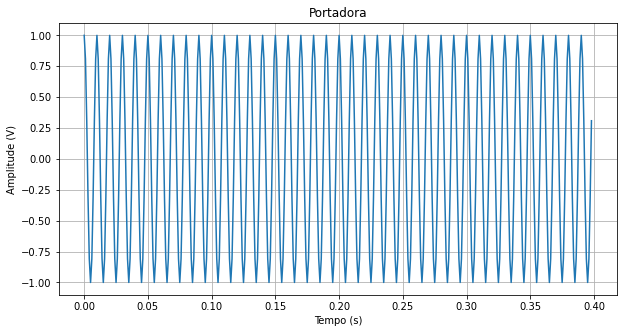

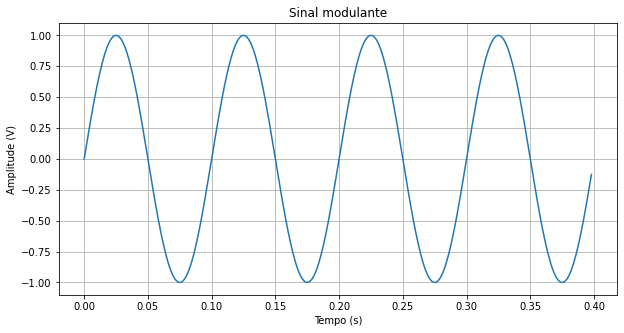

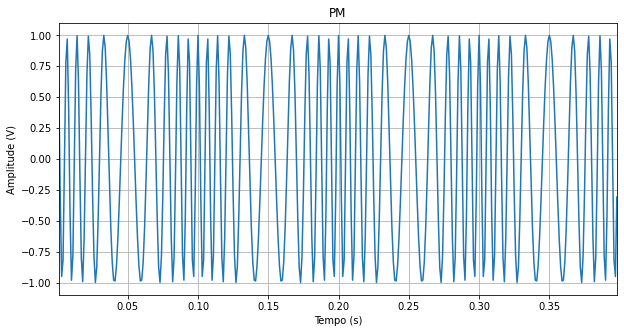

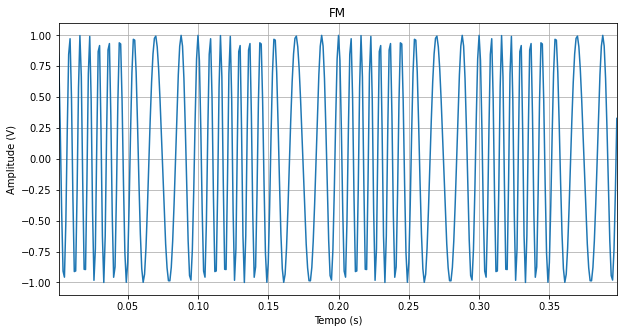

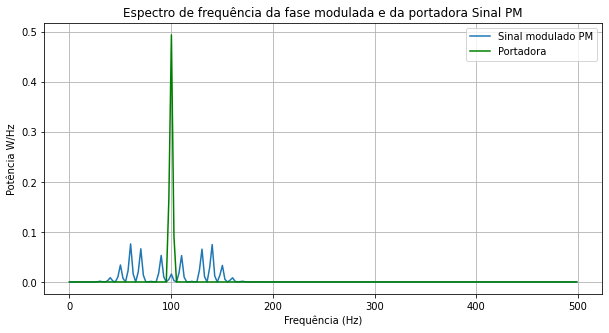

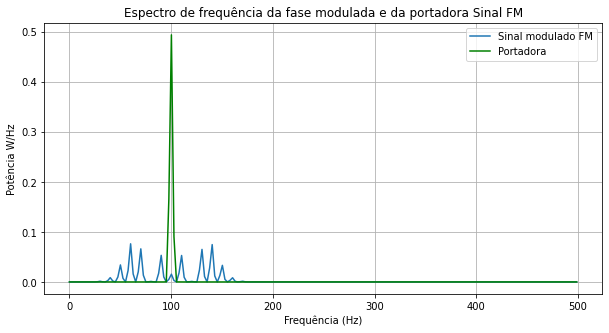

In [3]:
 #Geração do Sinal

Ac = 1  # Amplitude da portadora
fc = 100  # Frequência da portadora em Hz
fs = fc * 10  # Frequência de amostragem.
# Para um sinal analógico, fs > 2 x a máxima Frequência do sinal (Nyquist). (Consideramos 10 aqui para que o sinal seja reconstruído em alta resolução)

Ts = 1 / fs  # Calcula o intervalo de tempo.

fm = 10  # Frequência do sinal em Hz
T = 4 / fm  # Tempo do sinal gerado (4 periodos).

Am = 1 #pico do sinal modulante
t = arange(0, T - Ts, Ts)  # Cria vetor tempo.
m = Am * sin(2 * pi * fm * t)  # Este é o sinal modulado que você estará editando!
#m= ones(len(t))
#m = linspace(0, 10, len(t))/5

kp = 5  # sensibilidade a fase
kf = 50  # sensibilidade a frequencia

c = Ac * cos(2 * pi * fc * t)  # Portadora
y_pm = Ac * cos(2 * pi * fc * t + (kp * m))  # Sinal Modulado (PM)
y_fm = Ac * cos(2 * pi * fc * t + 2 * pi * kf * (cumsum(m) * Ts))  # Sinal Modulado (FM) através de um modulador de fase

# --------------------------------------
# Exemplo de plot de sinais no tempo e na frequência.
# --------------------------------------

# Declarando alguns parâmetros:

# Pode-se utilizar o comando "n.welch".
# Declarando alguns parâmetros:

NFFT = len(t)  # Resolução do espectro computado.
# WINDOW = ones(NFFT)  # Janela de Hamming.
WINDOW = windows.hann(NFFT, False)  # Janela de Hamming.

# OBS.: O entendimento profundo do uso e funcionamento das funções acima não é fundamental para o entendimento do exercício. 





rcParams['figure.figsize'] = [10, 5]
figure(1)
plot(t, c)
title('Portadora')
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
grid()

figure(2)
plot(t, m)
title('Sinal modulante')
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
grid()

figure(3)
plot(t, y_pm)
title('Sinal modulado PM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('PM')
grid()


figure(4)
plot(t, y_fm)
title('Sinal modulado FM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('FM')
grid()

# Espectro do sinal modulado PM

figure(5)
[f1, p1] = signal.welch(y_pm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'g')
title('Espectro de frequência da fase modulada e da portadora Sinal PM')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado PM', 'Portadora'])
grid()

# Espectro do sinal modulado FM

figure(6)
[f1, p1] = signal.welch(y_fm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'g')
title('Espectro de frequência da fase modulada e da portadora Sinal FM')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado FM', 'Portadora'])
grid()





Comparando os sinais modulados em FM e PM fica claro que o sinal FM apresenta uma menor frequência no sinal modulado quando o sinal modulante tem amplitude negativa, enquanto que o sinal modulado em PM varia a frequência se a amplitude do sinal modulante está crescendo (alta frequência) ou diminuindo (baixa frequência).

### b) Aplique o sinal modulante constante para os dois tipos de modulação;

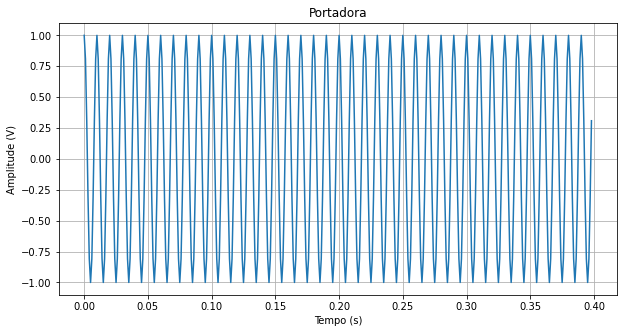

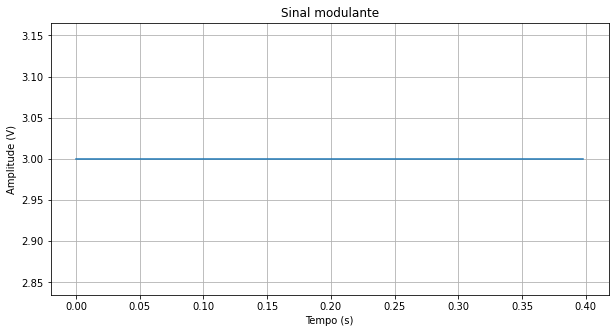

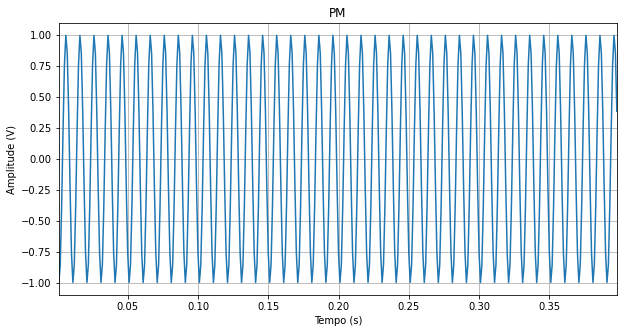

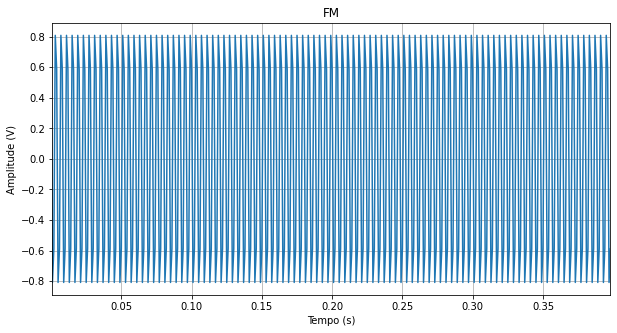

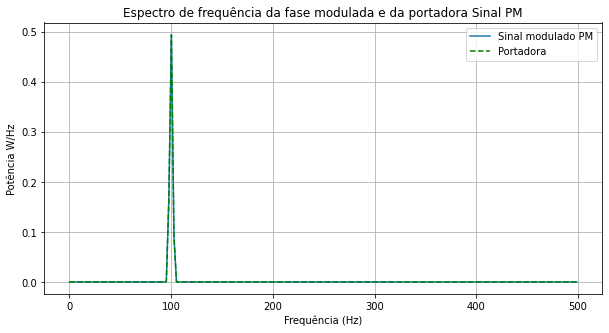

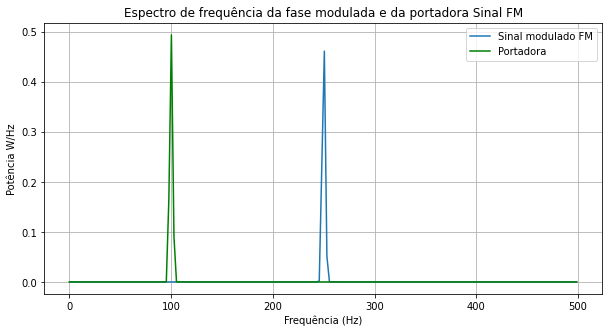

In [12]:
#Geração do Sinal

Ac = 1  # Amplitude da portadora
fc = 100  # Frequência da portadora em Hz
fs = fc * 10  # Frequência de amostragem.
# Para um sinal analógico, fs > 2 x a máxima Frequência do sinal (Nyquist). (Consideramos 10 aqui para que o sinal seja reconstruído em alta resolução)

Ts = 1 / fs  # Calcula o intervalo de tempo.

fm = 10  # Frequência do sinal em Hz
T = 4 / fm  # Tempo do sinal gerado (4 periodos).

Am = 1 #pico do sinal modulante
t = arange(0, T - Ts, Ts)  # Cria vetor tempo.
#m = Am * sin(2 * pi * fm * t)  # Este é o sinal modulado que você estará editando!
m= 3*ones(len(t))
#m = linspace(0, 10, len(t))/5

kp = 5  # sensibilidade a fase
kf = 50  # sensibilidade a frequencia

c = Ac * cos(2 * pi * fc * t)  # Portadora
y_pm = Ac * cos(2 * pi * fc * t + (kp * m))  # Sinal Modulado (PM)
y_fm = Ac * cos(2 * pi * fc * t + 2 * pi * kf * (cumsum(m) * Ts))  # Sinal Modulado (FM) através de um modulador de fase

# --------------------------------------
# Exemplo de plot de sinais no tempo e na frequência.
# --------------------------------------

# Declarando alguns parâmetros:

# Pode-se utilizar o comando "n.welch".
# Declarando alguns parâmetros:

NFFT = len(t)  # Resolução do espectro computado.
# WINDOW = ones(NFFT)  # Janela de Hamming.
WINDOW = windows.hann(NFFT, False)  # Janela de Hamming.

# OBS.: O entendimento profundo do uso e funcionamento das funções acima não é fundamental para o entendimento do exercício. 





rcParams['figure.figsize'] = [10, 5]
figure(1)
plot(t, c)
title('Portadora')
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
grid()

figure(2)
plot(t, m)
title('Sinal modulante')
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
grid()

figure(3)
plot(t, y_pm)
title('Sinal modulado PM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('PM')
grid()


figure(4)
plot(t, y_fm)
title('Sinal modulado FM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('FM')
grid()

# Espectro do sinal modulado PM

figure(5)
[f1, p1] = signal.welch(y_pm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'g--')
title('Espectro de frequência da fase modulada e da portadora Sinal PM')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado PM', 'Portadora'])
grid()

# Espectro do sinal modulado FM

figure(6)
[f1, p1] = signal.welch(y_fm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'g')
title('Espectro de frequência da fase modulada e da portadora Sinal FM')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado FM', 'Portadora'])
grid()

Como não há variação de amplitude no sinal modulante o sinal modulado em PM permanece igual a portadora, isso se confirma no espectro de frequência. Olhando o sinal modulado em FM notamos o aumento de frequência, pois o sinal modulante é uma constante >0, portanto a sua frequência será sempre maior que a portadora. No espectro de frequências do sinal FM notamos que o sinal modulado se localiza em uma frequência superior.


### c) Aplique o sinal modulante rampa para o a modulação PM e um sinal modulante constante para a modulação FM.

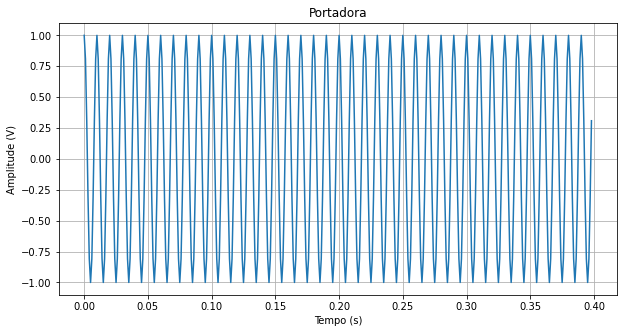

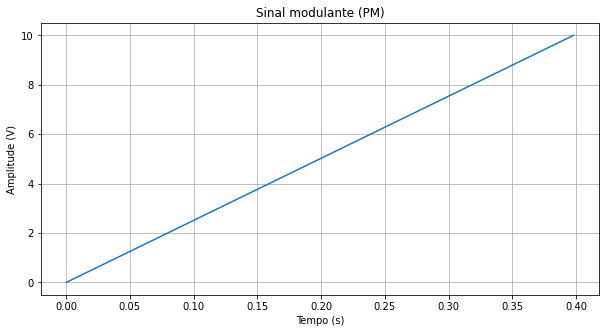

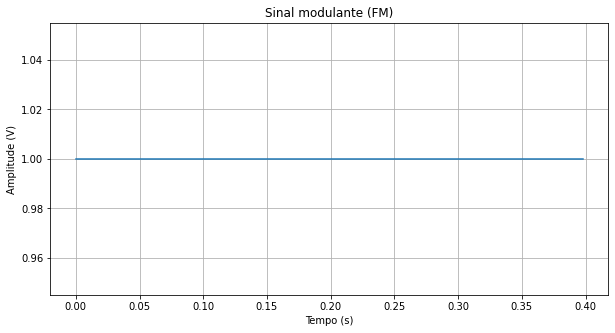

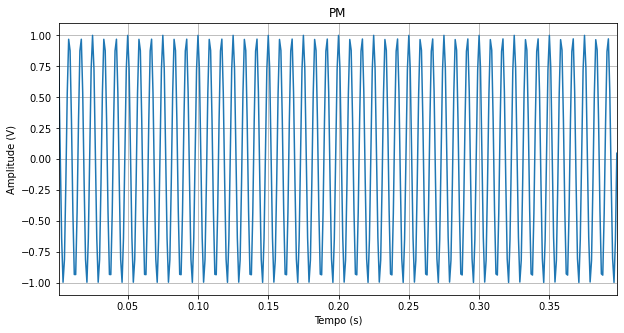

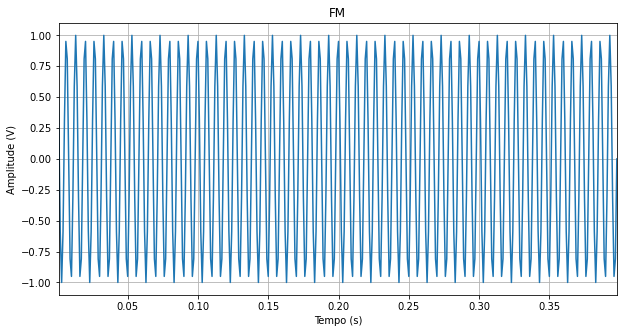

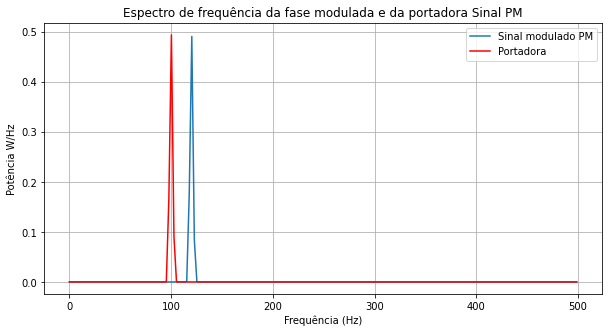

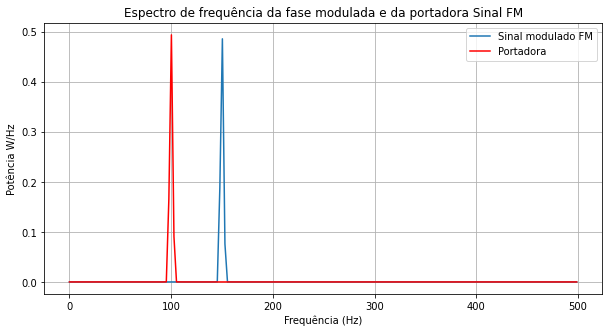

In [17]:
#Geração do Sinal

Ac = 1  # Amplitude da portadora
fc = 100  # Frequência da portadora em Hz
fs = fc * 10  # Frequência de amostragem.
# Para um sinal analógico, fs > 2 x a máxima Frequência do sinal (Nyquist). (Consideramos 10 aqui para que o sinal seja reconstruído em alta resolução)

Ts = 1 / fs  # Calcula o intervalo de tempo.

fm = 10  # Frequência do sinal em Hz
T = 4 / fm  # Tempo do sinal gerado (4 periodos).

Am = 1 #pico do sinal modulante
t = arange(0, T - Ts, Ts)  # Cria vetor tempo.
#m = Am * sin(2 * pi * fm * t)  # Este é o sinal modulado que você estará editando!
m= ones(len(t))
m1 = linspace(0, 10, len(t))

kp = 5  # sensibilidade a fase
kf = 50  # sensibilidade a frequencia

c = Ac * cos(2 * pi * fc * t)  # Portadora
y_pm = Ac * cos(2 * pi * fc * t + (kp * m1))  # Sinal Modulado (PM)
y_fm = Ac * cos(2 * pi * fc * t + 2 * pi * kf * (cumsum(m) * Ts))  # Sinal Modulado (FM) através de um modulador de fase

# --------------------------------------
# Exemplo de plot de sinais no tempo e na frequência.
# --------------------------------------

# Declarando alguns parâmetros:

# Pode-se utilizar o comando "n.welch".
# Declarando alguns parâmetros:

NFFT = len(t)  # Resolução do espectro computado.
# WINDOW = ones(NFFT)  # Janela de Hamming.
WINDOW = windows.hann(NFFT, False)  # Janela de Hamming.

# OBS.: O entendimento profundo do uso e funcionamento das funções acima não é fundamental para o entendimento do exercício. 





rcParams['figure.figsize'] = [10, 5]
figure(1)
plot(t, c)
title('Portadora')
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
grid()

figure(2)
plot(t, m1)
title('Sinal modulante (PM)')
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
grid()

figure(3)
plot(t, m)
title('Sinal modulante (FM)')
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
grid()

figure(4)
plot(t, y_pm)
title('Sinal modulado PM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('PM')
grid()


figure(5)
plot(t, y_fm)
title('Sinal modulado FM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('FM')
grid()

# Espectro do sinal modulado PM

figure(6)
[f1, p1] = signal.welch(y_pm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'r')
title('Espectro de frequência da fase modulada e da portadora Sinal PM')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado PM', 'Portadora'])
grid()

# Espectro do sinal modulado FM

figure(7)
[f1, p1] = signal.welch(y_fm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'r')
title('Espectro de frequência da fase modulada e da portadora Sinal FM')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado FM', 'Portadora'])
grid()

Neste caso o que ocorre de forma diferente do item anterior é a modulação PM. Aqui temos uma rampa como sinal modulante, portanto há variação de amplitude (crescente). Assim a modulação PM se comporta de maneira similar a da modulação FM com um sinal modulante constante e maior que zero, apresentando uma frequência maior que a portadora. Essa informação é confirmada observando os gráficos no tempo e na frequência.

## Exercício 2 - Considere um sinal modulante senoidal com amplitude 2 V, frequência 20 Hz e indíces de modulação igual a 0,1, 1, 2 e 3:


### a) Qual a diferença do sinal FM com índice de modulação 0.1 aos demais?

- $\beta = 0,1$

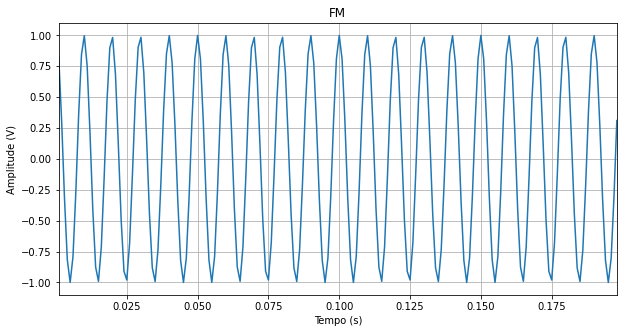

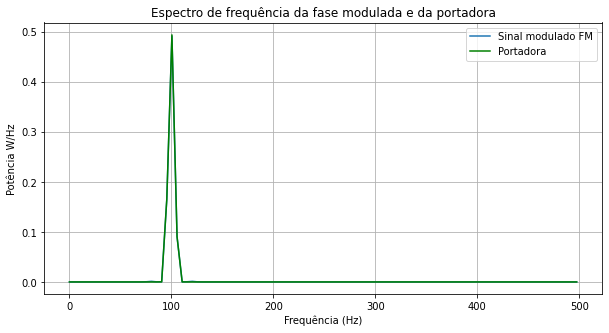

In [9]:


# Geração do Sinal

Ac = 1  # Amplitude da portadora
fc = 100  # Frequência da portadora em Hz
fs = fc * 10  # Frequência de amostragem.
# Para um sinal analógico, fs > 2 x a máxima Frequência do sinal (Nyquist). (Consideramos 10 aqui para que o sinal seja reconstruído em alta resolução)

Ts = 1 / fs  # Calcula o intervalo de tempo.

fm = 20  # Frequência do sinal em Hz
T = 4 / fm  # Tempo do sinal gerado (4 periodos).

Am = 2 #pico do sinal modulante
t = arange(0, T - Ts, Ts)  # Cria vetor tempo.
m = Am * sin(2 * pi * fm * t)  # Este é o sinal modulado que você estará editando!
#m= ones(length(t),1)
#m = linspace(0, 10, len(t))/5

kp = 5  # sensibilidade a fase
kf = 1  # sensibilidade a frequencia

c = Ac * cos(2 * pi * fc * t)  # Portadora
y_pm = Ac * cos(2 * pi * fc * t + (kp * m))  # Sinal Modulado (PM)
y_fm = Ac * cos(2 * pi * fc * t + 2 * pi * kf * (cumsum(m) * Ts))  # Sinal Modulado (FM) através de um modulador de fase

NFFT = len(t)  # Resolução do espectro computado.
# WINDOW = ones(NFFT)  # Janela de Hamming.
WINDOW = windows.hann(NFFT, False)  # Janela de Hamming.

figure(1)
plot(t, y_fm)
title('Sinal modulado FM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('FM')
grid()

figure(2)
[f1, p1] = signal.welch(y_fm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'g')
title('Espectro de frequência da fase modulada e da portadora')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado FM', 'Portadora'])
grid()


- $\beta = 1$

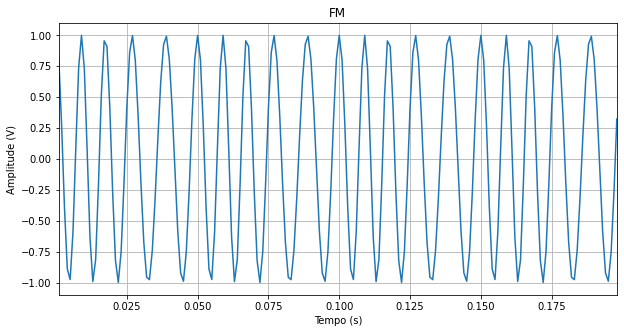

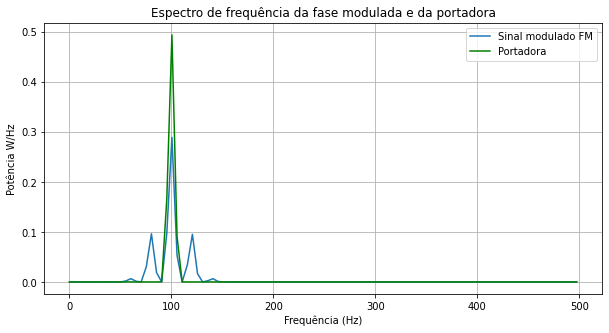

In [6]:
# Geração do Sinal

Ac = 1  # Amplitude da portadora
fc = 100  # Frequência da portadora em Hz
fs = fc * 10  # Frequência de amostragem.
# Para um sinal analógico, fs > 2 x a máxima Frequência do sinal (Nyquist). (Consideramos 10 aqui para que o sinal seja reconstruído em alta resolução)

Ts = 1 / fs  # Calcula o intervalo de tempo.

fm = 20  # Frequência do sinal em Hz
T = 4 / fm  # Tempo do sinal gerado (4 periodos).

Am = 2 #pico do sinal modulante
t = arange(0, T - Ts, Ts)  # Cria vetor tempo.
m = Am * sin(2 * pi * fm * t)  # Este é o sinal modulado que você estará editando!
#m= ones(length(t),1)
#m = linspace(0, 10, len(t))/5

kp = 5  # sensibilidade a fase
kf = 10  # sensibilidade a frequencia

c = Ac * cos(2 * pi * fc * t)  # Portadora
y_pm = Ac * cos(2 * pi * fc * t + (kp * m))  # Sinal Modulado (PM)
y_fm = Ac * cos(2 * pi * fc * t + 2 * pi * kf * (cumsum(m) * Ts))  # Sinal Modulado (FM) através de um modulador de fase

NFFT = len(t)  # Resolução do espectro computado.
# WINDOW = ones(NFFT)  # Janela de Hamming.
WINDOW = windows.hann(NFFT, False)  # Janela de Hamming.

figure(1)
plot(t, y_fm)
title('Sinal modulado FM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('FM')
grid()

figure(2)
[f1, p1] = signal.welch(y_fm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'g')
title('Espectro de frequência da fase modulada e da portadora')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado FM', 'Portadora'])
grid()

- $\beta = 2$

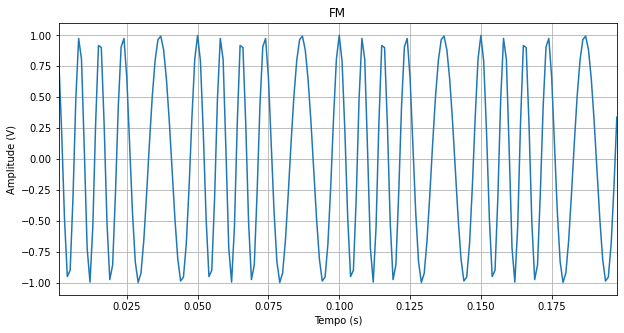

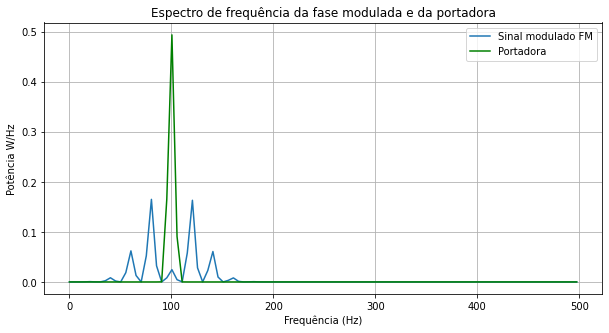

In [7]:
# Geração do Sinal

Ac = 1  # Amplitude da portadora
fc = 100  # Frequência da portadora em Hz
fs = fc * 10  # Frequência de amostragem.
# Para um sinal analógico, fs > 2 x a máxima Frequência do sinal (Nyquist). (Consideramos 10 aqui para que o sinal seja reconstruído em alta resolução)

Ts = 1 / fs  # Calcula o intervalo de tempo.

fm = 20  # Frequência do sinal em Hz
T = 4 / fm  # Tempo do sinal gerado (4 periodos).

Am = 2 #pico do sinal modulante
t = arange(0, T - Ts, Ts)  # Cria vetor tempo.
m = Am * sin(2 * pi * fm * t)  # Este é o sinal modulado que você estará editando!
#m= ones(length(t),1)
#m = linspace(0, 10, len(t))/5

kp = 5  # sensibilidade a fase
kf = 20  # sensibilidade a frequencia

c = Ac * cos(2 * pi * fc * t)  # Portadora
y_pm = Ac * cos(2 * pi * fc * t + (kp * m))  # Sinal Modulado (PM)
y_fm = Ac * cos(2 * pi * fc * t + 2 * pi * kf * (cumsum(m) * Ts))  # Sinal Modulado (FM) através de um modulador de fase

NFFT = len(t)  # Resolução do espectro computado.
# WINDOW = ones(NFFT)  # Janela de Hamming.
WINDOW = windows.hann(NFFT, False)  # Janela de Hamming.

figure(1)
plot(t, y_fm)
title('Sinal modulado FM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('FM')
grid()

figure(2)
[f1, p1] = signal.welch(y_fm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'g')
title('Espectro de frequência da fase modulada e da portadora')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado FM', 'Portadora'])
grid()

- $\beta = 3$

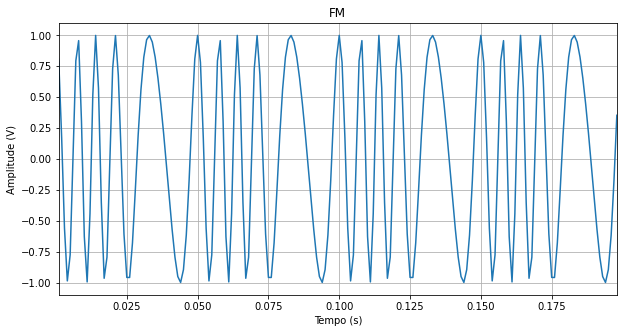

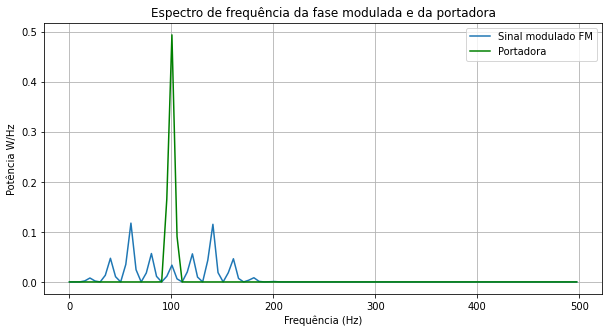

In [8]:
# Geração do Sinal

Ac = 1  # Amplitude da portadora
fc = 100  # Frequência da portadora em Hz
fs = fc * 10  # Frequência de amostragem.
# Para um sinal analógico, fs > 2 x a máxima Frequência do sinal (Nyquist). (Consideramos 10 aqui para que o sinal seja reconstruído em alta resolução)

Ts = 1 / fs  # Calcula o intervalo de tempo.

fm = 20  # Frequência do sinal em Hz
T = 4 / fm  # Tempo do sinal gerado (4 periodos).

Am = 2 #pico do sinal modulante
t = arange(0, T - Ts, Ts)  # Cria vetor tempo.
m = Am * sin(2 * pi * fm * t)  # Este é o sinal modulado que você estará editando!
#m= ones(length(t),1)
#m = linspace(0, 10, len(t))/5

kp = 5  # sensibilidade a fase
kf = 30  # sensibilidade a frequencia

c = Ac * cos(2 * pi * fc * t)  # Portadora
y_pm = Ac * cos(2 * pi * fc * t + (kp * m))  # Sinal Modulado (PM)
y_fm = Ac * cos(2 * pi * fc * t + 2 * pi * kf * (cumsum(m) * Ts))  # Sinal Modulado (FM) através de um modulador de fase

NFFT = len(t)  # Resolução do espectro computado.
# WINDOW = ones(NFFT)  # Janela de Hamming.
WINDOW = windows.hann(NFFT, False)  # Janela de Hamming.

figure(1)
plot(t, y_fm)
title('Sinal modulado FM')
xlim([t[1], t[-1]])
xlabel('Tempo (s)')
ylabel('Amplitude (V)')
title('FM')
grid()

figure(2)
[f1, p1] = signal.welch(y_fm, fs, WINDOW, nfft=NFFT, scaling='spectrum')
[f2, p2] = signal.welch(c, fs, WINDOW,  nfft=NFFT, scaling='spectrum')
plot(f1, abs(p1), f2, abs(p2), 'g')
title('Espectro de frequência da fase modulada e da portadora')
xlabel('Frequência (Hz)')
ylabel('Potência W/Hz')
legend(['Sinal modulado FM', 'Portadora'])
grid()

### b) O que muda em relação a posição das frequências laterais alterando o índice de modulação?

Analisando as situações solicitadas percebe-se que conforme o $\beta$ é aumentado as frequências laterais ficam mais dispersas.

### c) O que muda em relação a amplitude das frequências em torno da portadora, múltiplos da frequência do sinal modulando, ou seja, as frequências laterais alterando o indíce de modulação?

O $\beta$ irá determiar a variação da frequência do sinal modulado. Esse efeito fica evidente no primeiro plot de cada célula variando o $\beta$. Nota-se que conforme aumentamos o valor de $\beta$ as diferenças entre as frequências que representam os valores mais altos e mais baixos ficam cada vez mais evidentes.

### d) Qual a a banda ocupada por 90 % de potência do sinal FM. Considere β=3? Aplicar a tabela das funções de Bessel.

$\Delta f = 60$
$B_T = 160$
$n=4$

$P = \frac{1}{2} A_c^2 I_0(3)^2 + 2[I_1(3)^2+I_2(3)^2+I_3(3)^2]$

$P_{90\%} = [\frac{1}{2} A_c^2 0.97] 0.9 = 0.873$

$n=2$

$B_T = 2*n*F_n = 80Hz$